In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

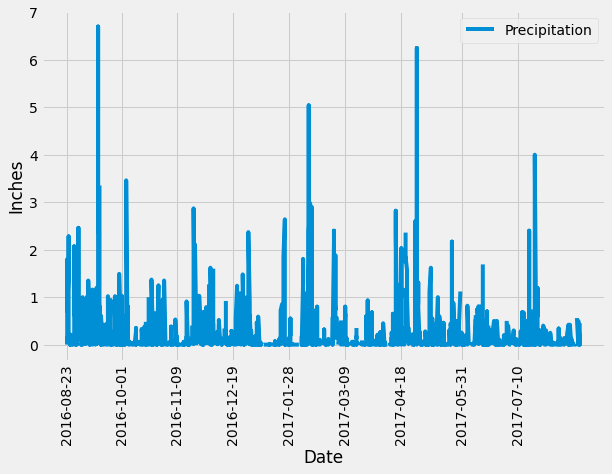

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_mark = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
twelve_months_precp = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date >= one_year_mark).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precp_df = pd.DataFrame(twelve_months_precp)
precp_df = precp_df.set_index('date')

# Sort the dataframe by date
sorted_precp_df = precp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (9,6))
plt.plot(sorted_precp_df, label = "Precipitation")

# Creating and positioning the xticks.
xticks = ['2016-08-23','2016-10-01','2016-11-09','2016-12-19',
          '2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10']
plt.xticks(ticks = xticks, rotation = 90)

# Attaching labels to the axis and inserting the legend.
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc = 'upper right')

plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_precp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.name).count()
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, Station.name, func.count(Measurement.station)]
most_active_station = session.query(*sel).filter(Measurement.station == Station.station).\
         group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).limit(3)
for station in most_active_station:
    print(station)

('USC00519281', 'WAIHEE 837.5, HI US', 2772)
('USC00519397', 'WAIKIKI 717.2, HI US', 2724)
('USC00513117', 'KANEOHE 838.1, HI US', 2709)


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_id = most_active_station[0][0]
num1 = session.query(Measurement.tobs).filter(Measurement.station == most_active_id).\
        order_by(Measurement.tobs).first()
lowest = num1[0]
num2 = session.query(Measurement.tobs).filter(Measurement.station == most_active_id).\
        order_by(Measurement.tobs.desc()).first()
highest = num2[0]
num3 = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_id).first()
average = num3[0]
print(f"The most active station has the temperatures: lowest = {round(lowest,2)}; highest = {round(highest,2)}; average = {round(average,2)}.")

The most active station has the temperatures: lowest = 54.0; highest = 85.0; average = 71.66.


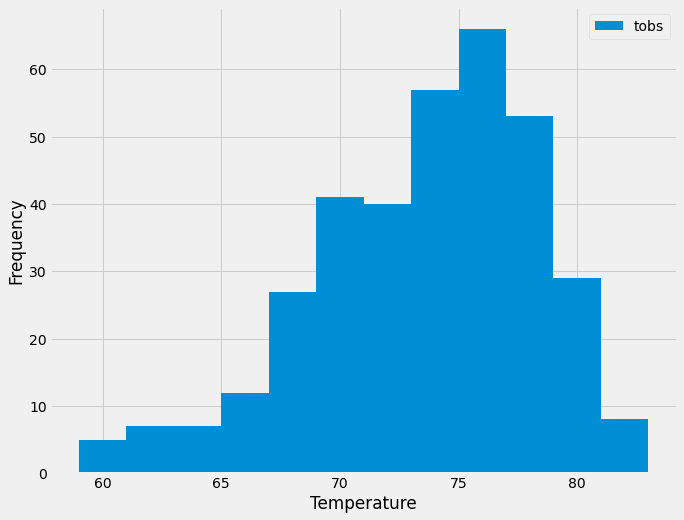

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months_temp = session.query(Measurement.tobs).\
                    filter(Measurement.date >= one_year_mark).filter(Measurement.station == most_active_id).all()
temp = []
for item in twelve_months_temp:
    temp.append(item[0])

plt.figure(figsize = (10,8))
plt.hist(temp, label = "tobs", bins = 12)

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="upper right")

plt.show()

# Close session

In [16]:
# Close Session
session.close()